### Datasets

### https://drive.google.com/drive/folders/16Aonba2LPTCR_-X5VPphTImpJck02g0n

### Imports

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
path="ai11.csv"
data=pd.read_csv(path)

In [4]:
data.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


### Cleaning

In [5]:
data.isnull().sum()

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating      0
product_company    0
profile_name       0
review_title       2
dtype: int64

In [6]:
data=data.dropna()

### Preprocessing Text

In [7]:
stop_words=set(stopwords.words('english'))

In [8]:
def preprocess(text):
    words=word_tokenize(text)
    filtered_words=[w for w in words if w.lower() not in stop_words]
    return " ".join(filtered_words)

In [9]:
data.loc[:,'cleaned_review']=data['review_text'].apply(preprocess)

In [10]:
sia=SentimentIntensityAnalyzer()

In [11]:
def analyze(text):
    scores=sia.polarity_scores(text)
    return scores['compound']

In [12]:
data.loc[:,'sentiment_scores']=data.loc[:,'cleaned_review'].apply(analyze)

### Categorizing Texts

In [13]:
def category(score):
    if score>0.75:
        return "Highly Positive"
    elif score<=0.75 and score>=0.05:
        return "Positive"
    elif score<-0.75:
        return "Highly Negetive"
    elif score>=-0.75 and score<=-0.05:
        return "Negetive"
    else:
        return "Neutral"

In [14]:
data.loc[:,'sentiment']=data.loc[:,'sentiment_scores'].apply(category)

### Visualization

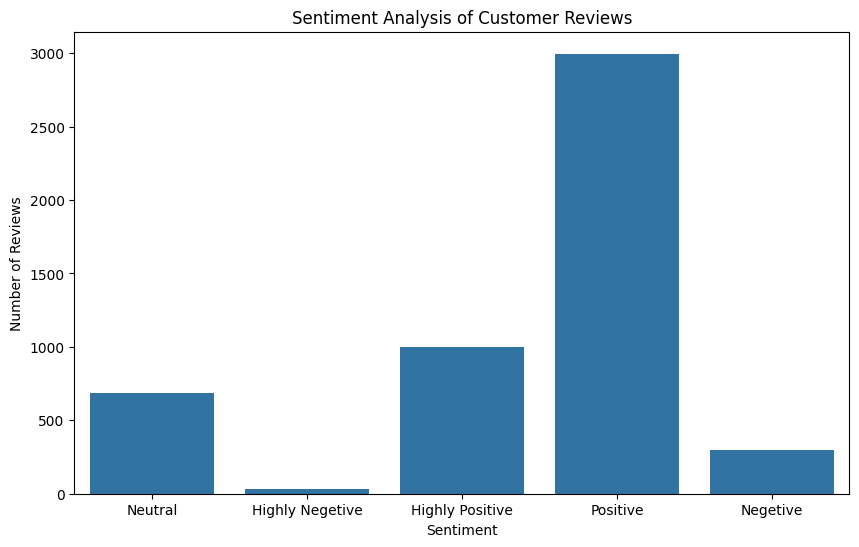

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="sentiment",data=data)
plt.title('Sentiment Analysis of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [16]:
data

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,cleaned_review,sentiment_scores,sentiment
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",NOTE :,0.0000,Neutral
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,bad experience iPhone xr phone . Back camera f...,-0.8481,Highly Negetive
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,Amazing phone amazing camera coming iPhone 7 p...,0.9246,Highly Positive
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,got iPhone XR today . product looks amazing . ...,0.8439,Highly Positive
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,'ve android user life decided try iPhone XR iO...,0.9423,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone,Dhamaka,0.0000,Neutral
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good,Goodbye,0.0000,Neutral
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.,Nothing,0.0000,Neutral
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic,Superbb,0.0000,Neutral
